## CS 4661 Project
# Predicting Stock Market Prices
Members: Nshan Kazaryan, Bailey Canham, Ly Jacky Nhiayi, Asahel Monroy

In [14]:
# import necessary tools
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt



In [15]:
# read csv file
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv")
import datetime as dt
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df['date']=stock_df['date'].map(dt.datetime.toordinal)
# gets the top 10 stocks in alphabetical order
# stock_df_top10 sstock_df_aal = stock_df[0:1259]tock_df[0:12590]

In [16]:
# stock_df_top10[::1259]
# stock_df['date']=stock_df['date'].map(dt.datetime.fromordinal)
# import pandas_ta


stock_df_aal = stock_df[0:1259]
stock_df_aal.pop("open")
stock_df_aal.pop("low")
stock_df_aal.pop("high")
stock_df_aal.pop("volume")
# stock_df_aal.ta.ema(close='close', length=10, append=True)
stock_df_aal.insert(0,"weekly_avg", " ")
stock_df_aal.insert(0,"30_entry_avg", " ")
stock_df_aal.insert(0,"50_entry_avg", " ")
stock_df_aal.insert(0,"100_entry_avg", " ")
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
0,,,,,734907,14.75,AAL
1,,,,,734910,14.46,AAL
2,,,,,734911,14.27,AAL
3,,,,,734912,14.66,AAL
4,,,,,734913,13.99,AAL
...,...,...,...,...,...,...,...
1254,,,,,736726,53.88,AAL
1255,,,,,736727,52.10,AAL
1256,,,,,736730,49.76,AAL
1257,,,,,736731,51.18,AAL


In [17]:
print(stock_df["close"][1:7].mean())
stock_df["close"][0:7]
stock_df

14.356666666666667


,date,open,high,low,close,volume,Name
0,734907,15.07,15.12,14.63,14.75,8407500,AAL
1,734910,14.89,15.01,14.26,14.46,8882000,AAL
2,734911,14.45,14.51,14.10,14.27,8126000,AAL
3,734912,14.30,14.94,14.25,14.66,10259500,AAL
4,734913,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,736726,76.84,78.27,76.69,77.82,2982259,ZTS
619036,736727,77.53,78.12,76.73,76.78,2595187,ZTS
619037,736730,76.64,76.92,73.18,73.83,2962031,ZTS
619038,736731,72.74,74.56,72.13,73.27,4924323,ZTS


In [18]:
for x in range(14,1259):
    stock_df_aal["weekly_avg"][x] = stock_df_aal["close"][x-14:x-7].mean()
for x in range(37,1259):
    stock_df_aal["30_entry_avg"][x] = stock_df_aal["close"][x-30-7:x-7].mean()
for x in range(57,1259):
    stock_df_aal["50_entry_avg"][x] = stock_df_aal["close"][x-50-7:x-7].mean()
for x in range(107,1259):
    stock_df_aal["100_entry_avg"][x] = stock_df_aal["close"][x-100-7:x-7].mean()
stock_df_aal

<ipython-input-18-810fc7838581>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_aal["weekly_avg"][x] = stock_df_aal["close"][x-14:x-7].mean()
/Users/jacky/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-18-810fc7838581>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_aal["30

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
0,,,,,734907,14.75,AAL
1,,,,,734910,14.46,AAL
2,,,,,734911,14.27,AAL
3,,,,,734912,14.66,AAL
4,,,,,734913,13.99,AAL
...,...,...,...,...,...,...,...
1254,49.6466,51.1978,53.305667,57.932857,736726,53.88,AAL
1255,49.7839,51.4362,53.552667,58.2,736727,52.10,AAL
1256,49.8886,51.6166,53.678333,57.674286,736730,49.76,AAL
1257,49.9717,51.7612,53.736667,56.97,736731,51.18,AAL


In [19]:
stock_df_aal = stock_df_aal[107:1259]
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
107,16.2605,17.2224,17.116,16.388571,735064,17.76,AAL
108,16.2805,17.2314,17.076,16.477143,735065,17.95,AAL
109,16.3043,17.2392,17.039667,16.531429,735066,18.45,AAL
110,16.331,17.2536,16.998,16.641429,735067,18.42,AAL
111,16.358,17.269,16.969667,16.791429,735068,18.23,AAL
...,...,...,...,...,...,...,...
1254,49.6466,51.1978,53.305667,57.932857,736726,53.88,AAL
1255,49.7839,51.4362,53.552667,58.2,736727,52.10,AAL
1256,49.8886,51.6166,53.678333,57.674286,736730,49.76,AAL
1257,49.9717,51.7612,53.736667,56.97,736731,51.18,AAL


<AxesSubplot:>

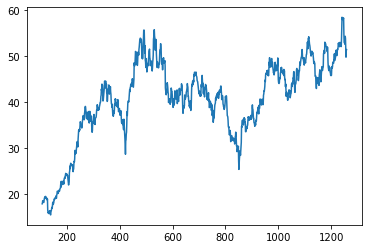

In [20]:
stock_df_aal.close.plot()

In [21]:
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
107,16.2605,17.2224,17.116,16.388571,735064,17.76,AAL
108,16.2805,17.2314,17.076,16.477143,735065,17.95,AAL
109,16.3043,17.2392,17.039667,16.531429,735066,18.45,AAL
110,16.331,17.2536,16.998,16.641429,735067,18.42,AAL
111,16.358,17.269,16.969667,16.791429,735068,18.23,AAL
...,...,...,...,...,...,...,...
1254,49.6466,51.1978,53.305667,57.932857,736726,53.88,AAL
1255,49.7839,51.4362,53.552667,58.2,736727,52.10,AAL
1256,49.8886,51.6166,53.678333,57.674286,736730,49.76,AAL
1257,49.9717,51.7612,53.736667,56.97,736731,51.18,AAL


In [22]:
stock_df_aal.head()
feature_cols_1 = ["date","100_entry_avg","50_entry_avg","30_entry_avg","weekly_avg"]
feature_cols_2 = ["date","weekly_avg"]
feature_cols_3 = ["date","30_entry_avg"]
feature_cols_4 = ["date","100_entry_avg"]
feature_cols = ["date"]

# feature_cols = ["date","30_entry_avg"]


X_all = scale(stock_df_aal[feature_cols_1])
X_week = scale(stock_df_aal[feature_cols_2])
X_month = scale(stock_df_aal[feature_cols_3])
X_date_only = scale(stock_df_aal[feature_cols])
X_100 = scale(stock_df_aal[feature_cols_4])

y = stock_df_aal["close"]
# y = scale(stock_df_aal["close"])
# X = stock_df_aal[feature_cols]
# y.plot()
# X

In [24]:
import math
s_f = .6
n_train = math.floor(s_f * X_all.shape[0])
n_test = math.ceil((1-s_f) * X_all.shape[0])

X_train_all = X_all[:n_train]
y_train_all = y[:n_train]
X_test_all = X_all[n_train:]
y_test_all = y[n_train:]


X_train_week = X_week[:n_train]
y_train_week = y[:n_train]
X_test_week = X_week[n_train:]
y_test_week = y[n_train:]

X_train_month = X_month[:n_train]
y_train_month = y[:n_train]
X_test_month = X_month[n_train:]
y_test_month = y[n_train:]

X_train_date_only = X_date_only[:n_train]
y_train_date_only = y[:n_train]
X_test_date_only = X_date_only[n_train:]
y_test_date_only = y[n_train:]

X_train_100 = X_100[:n_train]
y_train_100 = y[:n_train]
X_test_100 = X_100[n_train:]
y_test_100 = y[n_train:]


In [25]:
# import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, 
#                                                     random_state=3)

linear_regression_all = LinearRegression()
linear_regression_week = LinearRegression()
linear_regression_month = LinearRegression()
linear_regression_100 = LinearRegression()
linear_regression_date = LinearRegression()

linear_regression_all.fit(X_train_all,y_train_all)
# y_test.plot()
y_predict_all = linear_regression_all.predict(X_test_all)
mse_list = cross_val_score(linear_regression_all, X_test_all, y_test_all, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

linear_regression_week.fit(X_train_week,y_train_week)
# y_test.plot()
y_predict_week = linear_regression_week.predict(X_test_week)
mse_list = cross_val_score(linear_regression_week, X_test_week, y_test_week, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

linear_regression_month.fit(X_train_month,y_train_month)
# y_test.plot()
y_predict_month = linear_regression_month.predict(X_test_month)
mse_list = cross_val_score(linear_regression_month, X_test_month, y_test_month, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

linear_regression_date.fit(X_train_date_only,y_train_date_only)
# y_test.plot()
y_predict_date = linear_regression_date.predict(X_test_date_only)
mse_list = cross_val_score(linear_regression_date, X_test_date_only, y_test_all, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

linear_regression_100.fit(X_train_100,y_train_100)
# y_test.plot()
y_predict_100 = linear_regression_100.predict(X_test_100)
mse_list = cross_val_score(linear_regression_100, X_test_100, y_test_100, cv=10, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

[2.51232199 3.65782917 3.3418462  3.28624345 1.97709309 2.14233779
 2.86385892 3.17422698 4.16965472 2.85958879]
2.9985001110319915
[3.17958762 3.44175927 1.60840865 3.8529953  1.73712953 2.28270273
 2.77482085 3.06007211 3.18420149 2.85096509]
2.797264264044249
[4.52622959 3.66636608 1.3520706  5.4920844  2.24430428 2.73149155
 3.2774566  4.54041004 3.47136792 2.58420273]
3.3885983795599266
[3.98233968 5.61762277 2.10962728 5.91489669 4.23000856 2.21782266
 3.75081365 3.77206514 3.66988124 2.40303372]
3.766811137916599
[4.56913202 5.68778012 3.96042339 6.24242434 4.32009806 2.09108936
 3.79369309 3.70411909 3.61301147 2.39625715]
4.037802808484997


In [ ]:
y_test_all=y_test_all.reset_index(drop=True)
y_test_all


0      39.19
1      39.94
2      41.17
3      40.91
4      40.92
       ...  
456    53.88
457    52.10
458    49.76
459    51.18
460    51.40
Name: close, Length: 461, dtype: float64

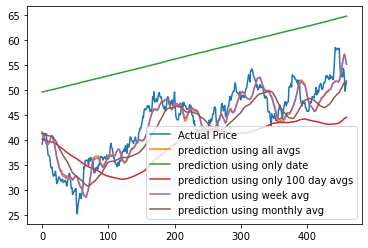

In [ ]:
plt.plot(y_test_all,label="Actual Price")
plt.plot(y_predict_all, label="prediction using all avgs")
plt.plot(y_predict_date, label="prediction using only date")
plt.plot(y_predict_100, label="prediction using only 100 day avgs")
plt.plot(y_predict_week, label="prediction using week avg")
plt.plot(y_predict_month, label="prediction using monthly avg")
leg = plt.legend()
plt.show()

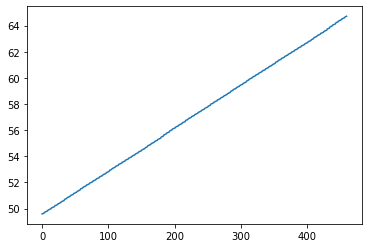

In [ ]:
plt.plot(y_predict_date)

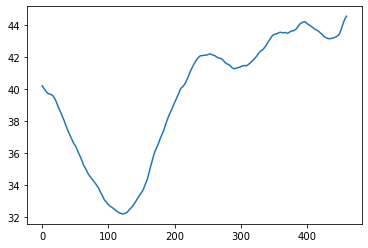

In [ ]:
plt.plot(y_predict_100)

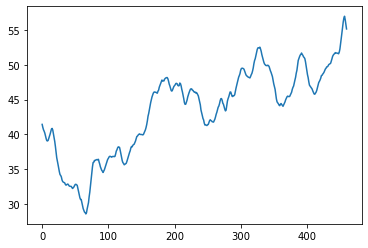

In [ ]:
plt.plot(y_predict_week)

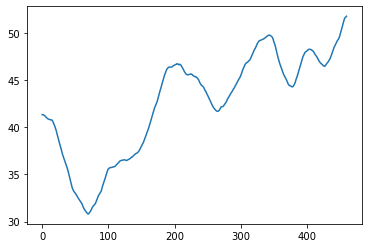

In [ ]:
plt.plot(y_predict_month)

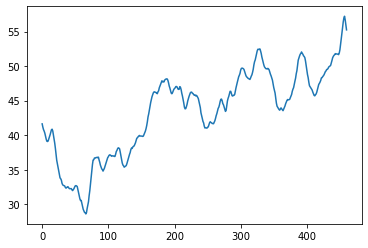

In [ ]:
plt.plot(y_predict_all)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(stock_df[['Name']]).toarray())

stock_df_encode = stock_df.join(encoder_df)

stock_df_encode.drop('Name', axis=1, inplace=True)
stock_df_encode.columns = ['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM']


ValueError: Length mismatch: Expected axis has 511 elements, new values have 10 elements

In [ ]:
old_val = stock_df["close"]

series_shifted = old_val['A'].shift()
series_shifted